In [1]:
%matplotlib inline
import sys

import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

import datetime

import time

sns.set()
pal = sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
#Load complete dataset for NYC taxi service for the month of January 2018
#Source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

df_nycTaxi = pd.read_csv('yellow_tripdata_2018-01.csv')

In [3]:
df_nycTaxi.info() #near 9 million entries, ~736MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   RatecodeID             int64  
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.1+ GB


In [4]:
df_nycTaxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5000,1,N,41,24,2,4.5000,0.5000,0.5000,0.0000,0.0000,0.3000,5.8000
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7000,1,N,239,140,2,14.0000,0.5000,0.5000,0.0000,0.0000,0.3000,15.3000
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8000,1,N,262,141,1,6.0000,0.5000,0.5000,1.0000,0.0000,0.3000,8.3000
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2000,1,N,140,257,2,33.5000,0.5000,0.5000,0.0000,0.0000,0.3000,34.8000
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5000,1,N,246,239,1,12.5000,0.5000,0.5000,2.7500,0.0000,0.3000,16.5500


In [5]:
#check if there is duplicated rows (this takes a while to run):
len(df_nycTaxi[df_nycTaxi.duplicated() == True])

1

In [6]:
#Show total null values per column. 
df_nycTaxi.isnull().sum() 

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
def dateParser(s):
    """
    Function that takes a string in the format yyyy-mm-dd hh:mm:ss, and
    returns the same as a datetime object.
    """
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]), int(s[14:16]), int(s[18:20]))

In [8]:
   def duration_to_minutes(s):
    """
    Function that takes a string with the hh:mm:ss format and
    returns the integer equivalent of the total time in minutes, 
    or zero for missing values in a Pandas dataframe.
    """
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [11]:
#Apply parser to pickup datetime data
df_nycTaxi['pikup_date_hour'] = df_nycTaxi.tpep_pickup_datetime.apply(dateParser)


In [14]:
#Apply parser to drop off datetime data
df_nycTaxi['drop_date_hour'] = df_nycTaxi.tpep_dropoff_datetime.apply(dateParser)


In [15]:
#Drop repeated column
df_nycTaxi = df_nycTaxi.drop('tpep_pickup_datetime', axis=1)
df_nycTaxi = df_nycTaxi.drop('tpep_dropoff_datetime', axis=1)

In [17]:
df_nycTaxi.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pikup_date_hour,drop_date_hour
0,1,1,0.5000,1,N,41,24,2,4.5000,0.5000,0.5000,0.0000,0.0000,0.3000,5.8000,2018-01-01 00:21:05,2018-01-01 00:24:03
1,1,1,2.7000,1,N,239,140,2,14.0000,0.5000,0.5000,0.0000,0.0000,0.3000,15.3000,2018-01-01 00:44:05,2018-01-01 01:03:05
2,1,2,0.8000,1,N,262,141,1,6.0000,0.5000,0.5000,1.0000,0.0000,0.3000,8.3000,2018-01-01 00:08:06,2018-01-01 00:14:01
3,1,1,10.2000,1,N,140,257,2,33.5000,0.5000,0.5000,0.0000,0.0000,0.3000,34.8000,2018-01-01 00:20:02,2018-01-01 00:52:01
4,1,2,2.5000,1,N,246,239,1,12.5000,0.5000,0.5000,2.7500,0.0000,0.3000,16.5500,2018-01-01 00:09:08,2018-01-01 00:27:06


In [18]:
#Create a column with the date, without the time. This will be useful later.
df_nycTaxi['pikup_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), df_nycTaxi['pikup_date_hour'].values))


In [19]:
#Get trip pick up day of the month
df_nycTaxi['day'] = df_nycTaxi['pikup_date_hour'].dt.day 


In [20]:
#Get trip pick up hour from timestamp
df_nycTaxi['pickupHour'] = df_nycTaxi['pikup_date_hour'].dt.hour 

df_nycTaxi['dropOffHour'] = df_nycTaxi['drop_date_hour'].dt.hour


In [21]:
#trip duration from datetime
df_nycTaxi['tripDuration'] = df_nycTaxi['drop_date_hour']  - df_nycTaxi['pikup_date_hour']
df_nycTaxi['tripDuration']  = df_nycTaxi['tripDuration']/np.timedelta64(1,'m')


In [22]:
#Create a plotting dataframe with counts (number of trips) grouped by day:
pikupByDate = df_nycTaxi.groupby('pikup_date')[ 'VendorID'].count() 


In [23]:
#filter any data that is not in the month of January
pikupByDate = pikupByDate['2018-01-01':'2018-01-31']


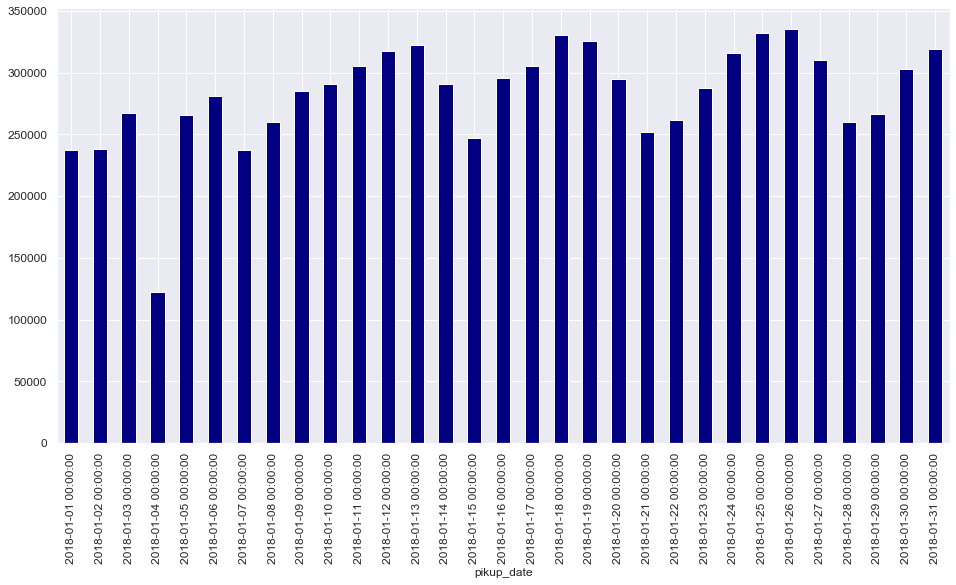

In [24]:
fig = plt.figure()
ax = pikupByDate['2018-01-01':'2018-01-31'].plot(figsize = (16, 8), fontsize = 12,  color = 'navy', kind='bar')


In [26]:
#Create a plotting dataframe with counts (number of trips) grouped by hour:
pikupByHour = df_nycTaxi.groupby('pickupHour')[ 'VendorID'].count() 

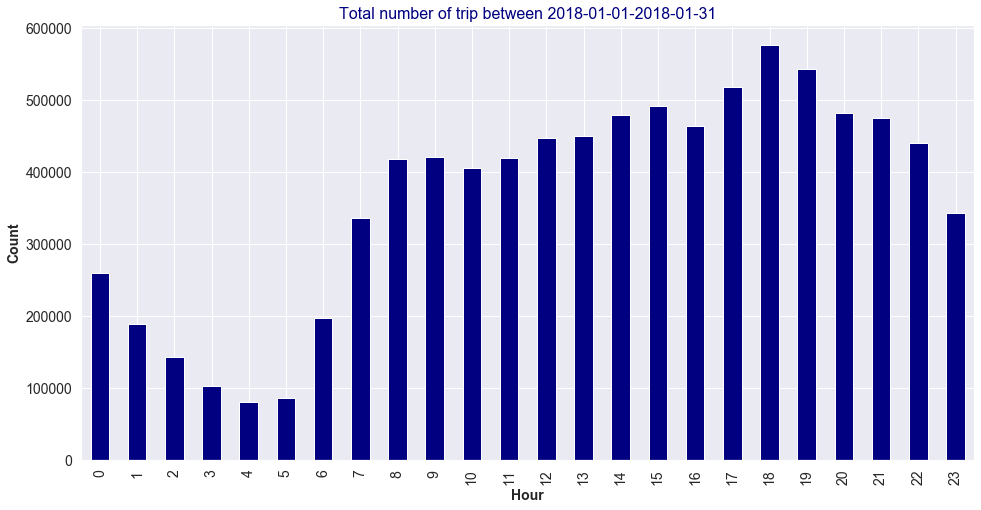

In [27]:
ax = pikupByHour.plot(figsize = (16, 8), fontsize = 12,  color = 'navy', kind='bar')
plt.ylabel('count')
plt.tick_params(labelsize=14)
plt.ylabel('Count', fontsize = 14, weight='bold')
plt.xlabel('Hour', fontsize = 14, weight='bold')
plt.title('Total number of trip between 2018-01-01-2018-01-31', color='navy', fontsize=16)
plt.show()

In [ ]:
#Create data to plot with average distance and duration grouped by origin-destination location pairs:
df_distDur = df_nycTaxi.groupby(['PULocationID', 'DOLocationID'])['trip_distance', 'tripDuration'].mean()
df_distDur.values



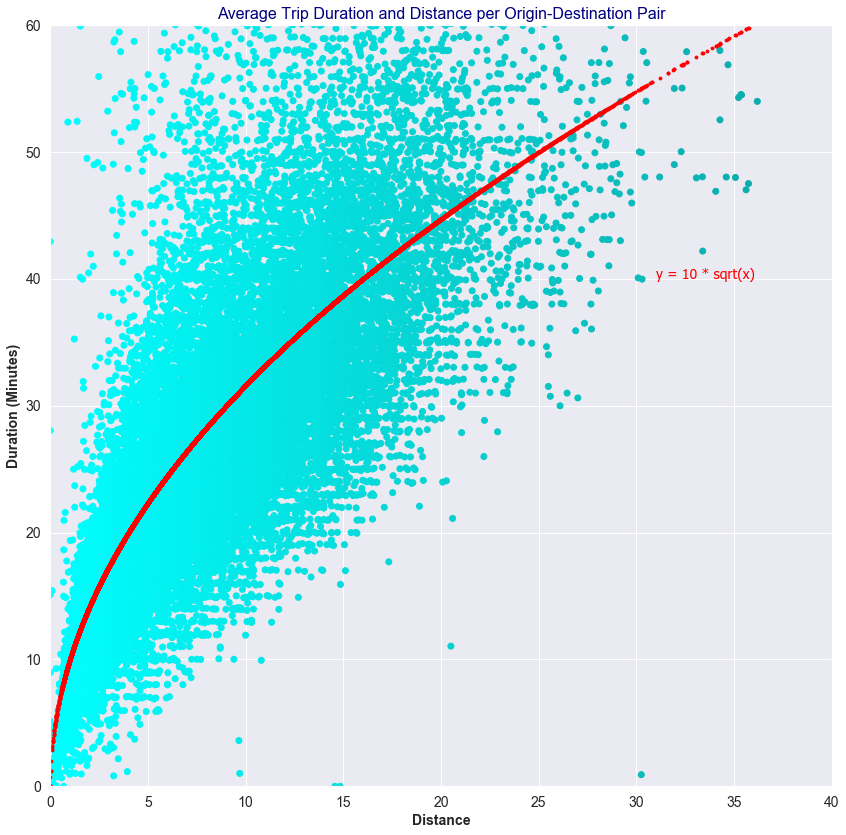

In [29]:
#Create plot.
distance = df_distDur.values[:,:1]
duration = df_distDur.values[:,1:]
duration_hat = pd.Series(distance.reshape(25341,)).apply(lambda x: 10*np.sqrt(x))

plt.figure(figsize = (14,14))
cmap = sns.dark_palette('cyan', 3, reverse = True, as_cmap=True)

plt.scatter(distance, duration, c=distance, cmap= cmap) # it looks like a 10*sqrt(x) power distribution
plt.scatter(distance, duration_hat, color='red', s=8)

font = {'color': 'red', 'size': 14, 'family': 'Tahoma'}
plt.text(31, 40, 'y = 10 * sqrt(x)', fontdict = font) 
plt.xlim(0, 40)
plt.ylim(0, 60)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (Minutes)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')


plt.show()